In [13]:
import json
import matplotlib.pyplot as plt


In [ ]:
# Lists to store beam sizes, scores, and brevity penalties
beam_sizes = []
scores = []
bps = []

# Loop over beam sizes
for beam_size in range(1, 26):
    translation_file_score = f"assignments/05/beam_search/translations_beam_{beam_size}_sb_score.txt"
    
    with open(translation_file_score, 'r') as file:
        data = json.load(file)
        
        # Extract score and brevity penalty
        bleu = data.get("score", 0.0)
        bp_match = re.search(r'BP = (\d+\.\d+)', data.get("verbose_score", ""))
        bp = float(bp_match.group(1)) if bp_match else 0.0
        
        beam_sizes.append(beam_size)
        scores.append(bleu)
        bps.append(bp)

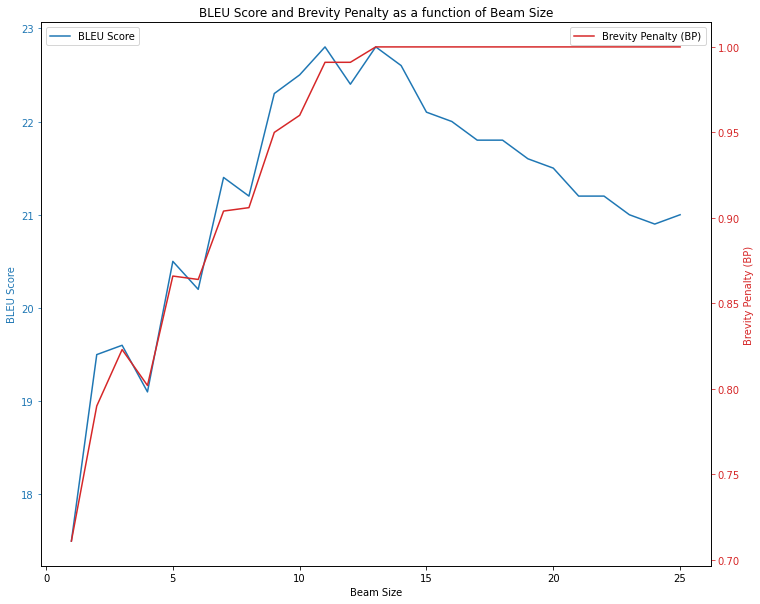

In [22]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 10))

color_blue = '#1f77b4'  # Nice shade of blue
ax1.plot(beam_sizes, scores, color_blue, label='BLEU Score')
ax1.set_xlabel('Beam Size')
ax1.set_ylabel('BLEU Score', color=color_blue)
ax1.tick_params('y', colors=color_blue)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color_red = '#d62728'  # Nice shade of red
ax2.plot(beam_sizes, bps, color_red, label='Brevity Penalty (BP)')
ax2.set_ylabel('Brevity Penalty (BP)', color=color_red)
ax2.tick_params('y', colors=color_red)
ax2.legend(loc='upper right')

plt.title('BLEU Score and Brevity Penalty as a function of Beam Size')
plt.savefig('assignments/05/beam_search/scores_bp.png', facecolor='w')

plt.show()
